In [7]:
import pandas as pd
import numpy as np
data = pd.read_csv('happyscore_income.csv')
data.head()

,country,adjusted_satisfaction,avg_satisfaction,std_satisfaction,avg_income,median_income,income_inequality,region,happyScore,GDP,country.1
0,Armenia,37.0,4.9,2.42,2096.76,1731.506667,31.445556,'Central and Eastern Europe',4.350,0.76821,Armenia
1,Angola,26.0,4.3,3.19,1448.88,1044.240000,42.720000,'Sub-Saharan Africa',4.033,0.75778,Angola
2,Argentina,60.0,7.1,1.91,7101.12,5109.400000,45.475556,'Latin America and Caribbean',6.574,1.05351,Argentina
3,Austria,59.0,7.2,2.11,19457.04,16879.620000,30.296250,'Western Europe',7.200,1.33723,Austria
4,Australia,65.0,7.6,1.80,19917.00,15846.060000,35.285000,'Australia and New Zealand',7.284,1.33358,Australia


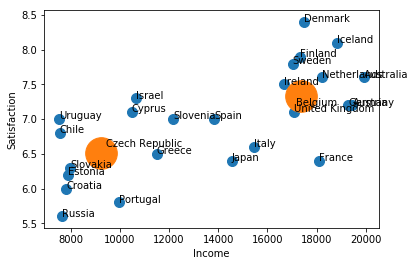

In [11]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
data.sort_values("avg_satisfaction", inplace=True, ascending=False)
midclass = data[data['avg_income']>7500]
midclass = midclass[midclass['avg_income']<=20000]
income = midclass['avg_income']
sat = midclass['avg_satisfaction']
income_sat = np.column_stack((income,sat))
km_res = KMeans(n_clusters=2).fit(income_sat)
clusters = km_res.cluster_centers_
plt.scatter(midclass['avg_income'],midclass['avg_satisfaction'], s=100)
plt.scatter(clusters[:,0],clusters[:,1], s = 1000)
plt.xlabel('Income')
plt.ylabel('Satisfaction')
for k,row in midclass.iterrows():
    plt.text(row['avg_income'],
             row['avg_satisfaction'],
             row['country'])
